###Legenda de cada Coluna

Para Auxiliar em um melhor entendimento dos dados, foi criado uma legenda qeu irá facilitar na identificação do propósito de cada coluna.

1 - ID's
 - ***order_id:*** Identidade única de cada pedido.
 - ***customer_id:*** Chave que liga o pedido ao cliente (específica para aquela compra).
 - ***customer_unique_id:*** O "CPF" do cliente. Permite identificar se o mesmo cliente fez
 - ***product_id:*** Identidade única do produto vendido
 - ***seller_id:*** Identidade única do lojista que vendeu o produto.
 - ***review_id:*** Identificador da avaliação deixada pelo cliente.

2 - Logística e Datas (Fluxo do Pedido)
 - ***order_status:*** Estado atual (entregue, cancelado, enviado, etc.).

 - ***order_purchase_timestamp:*** Momento em que o cliente comprou.

 - ***order_approved_at:*** Quando o pagamento foi confirmado.

 - ***order_delivered_carrier_date:*** Quando o vendedor entregou o pacote aos Correios/Transportadora.

- ***order_delivered_customer_date:*** Quando o produto chegou na casa do cliente.

- ***order_estimated_delivery_date***: A data de entrega que foi prometida no site.

- ***shipping_limit_date:*** Prazo máximo que o vendedor tinha para postar o produto.

- ***approval_delay_hours:*** Quanto tempo o sistema levou para aprovar o pagamento (calculada por nós).

3 - Valores Financeiros e Pagamentos
- ***order_item_id***: Número sequencial do item dentro do pedido (ex: se comprou 3 itens, teremos 1, 2 e 3).
- ***price:*** Preço unitário do produto.
- ***freight_value:*** Custo do frete para aquele item.
- ***preco_total:*** A soma de $price + freight\_value$.
- ***payment_value:*** Valor total pago pelo cliente (pode incluir descontos ou juros).
- ***payment_sequential:*** Se o cliente usou mais de um método (ex: dois cartões), mostra a sequência.
- ***payment_installments:*** Número de parcelas escolhidas.
- ***payment_type:*** Forma de pagamento (boleto, cartão, voucher, etc.)

4. Satisfação do Cliente (Reviews)
- ***review_score:*** Nota de 1 a 5 dada pelo cliente.

- ***review_comment_title:*** Título do comentário da avaliação.

- ***review_comment_message***: Texto detalhado da opinião do cliente.

- ***review_creation_date:*** Data em que a pesquisa de satisfação foi enviada ao cliente.

- ***review_answer_timestamp:*** Data/hora em que o cliente respondeu à pesquisa.

5 - Características do Produto
- ***product_category_name:*** Nome da categoria (ex: beleza_saude, automotivo).
- ***product_name_lenght:*** Quantidade de caracteres no nome do produto
- ***product_description_lenght:*** Quantidade de caracteres na descrição do anúncio.
- ***product_photos_qty:*** Quantidade de fotos que o anúncio possuía.
- ***product_weight_g:*** Peso do produto em gramas.
- ***product_volume_cm3:*** Espaço físico ocupado ($cm^3$).

6 -  Localização (Geografia)
- **customer_zip_code_prefix / seller_zip_code_prefix**: Os 5 primeiros dígitos do CEP.

- ***customer_city / seller_city:*** Cidade do comprador e do vendedor.

- ***customer_state / seller_state:*** Estado (UF) do comprador e do vendedor.

## Início

In [4]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [7]:
dados = pd.read_csv("/content/dados_totais.csv")

In [8]:
dados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_delay_hours,order_item_id,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,1.0,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,1976.0,9350.0,Maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,1.0,...,BA,perfumaria,29.0,178.0,1.0,400.0,4693.0,31570.0,Belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,1.0,...,GO,automotivo,46.0,232.0,1.0,420.0,9576.0,14840.0,Guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,1.0,...,RN,pet_shop,59.0,468.0,3.0,450.0,6000.0,31842.0,Belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,1.0,...,SP,papelaria,38.0,316.0,4.0,250.0,11475.0,8752.0,Mogi das cruzes,SP


In [9]:
dados.shape

(114092, 39)

In [10]:
dados.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'approval_delay_hours', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'preco_total',
       'payment_value', 'payment_sequential', 'payment_installments',
       'payment_type', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_volume_cm3', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [11]:
# #Criando uma lista das colunas que desejo remover
# remover_colunas = [
#     "order_approved_at",
#     "order_purchase_timestamp",
#     "product_weight_g",
#     "product_name_lenght",
#     "product_description_lenght",
#     "product_photos_qty"
# ]
# #Removendo as colunas
# dados.drop(columns=remover_colunas, inplace=True, errors='ignore')

In [13]:
# dados['order_status'].value_counts()

# Qual o total de vendas por ano? Qual ano performou melhor ?

Colunas que serão ultilizadas.
 - **"preco_total"** A soma de  price+freight_value.
 - **"order_purchase_timestamp"** Momento em que o cliente comprou.


In [20]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [14]:
#Criando um novo DataFrame
dados_vendas_por_ano = dados.copy()
# #Removendo os as colunas que foram canceladas ou não foram processadas.
# dados_vendas_por_ano = dados_vendas_por_ano.query("order_status not in ['canceled', 'unavailable']")
# #retirando os pagamentos confirmados que estão Nulos
# dados_vendas_por_ano = dados_vendas_por_ano.query("order_approved_at.notnull()")
# #retirando os preçõs que estão nulos
dados_vendas_por_ano = dados_vendas_por_ano.query('price.notnull()')
dados_vendas_por_ano = dados_vendas_por_ano[['preco_total', 'order_purchase_timestamp']]

In [15]:
#Verificando se existe dados nulos
dados_vendas_por_ano[dados_vendas_por_ano['preco_total'].isnull()]

,preco_total,order_purchase_timestamp


In [17]:
#Transformando o tipo da coluna específica, de str para Data
dados_vendas_por_ano['order_purchase_timestamp'] = pd.to_datetime(dados_vendas_por_ano['order_purchase_timestamp'])
#Criando uma coluna que represente os anos
dados_vendas_por_ano['ano'] = dados_vendas_por_ano['order_purchase_timestamp'].dt.year
#Retirando a coluna 'order_purchase_timestamp'
dados_vendas_por_ano.drop(labels='order_purchase_timestamp', axis=1, inplace=True)

#Agrupando os dados
dados_vendas_por_ano = dados_vendas_por_ano.groupby(['ano']).aggregate('sum')


In [19]:
dados_vendas_por_ano

,preco_total
ano,
2016,57364.03
2017,7185617.25
2018,8672891.04


Criando os gráficos

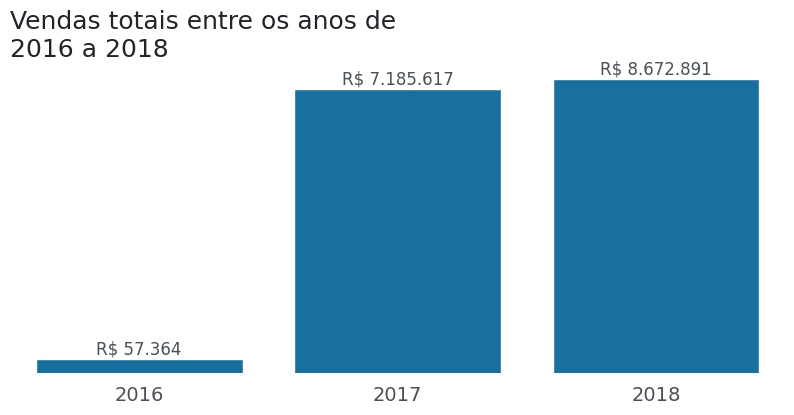

In [29]:
def grafico(cores: list=[AZUL2]):

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  sns.set_theme(style='white')

  ax.set_yscale('log')
  # Gerando o gráfico de colunas
  ax = sns.barplot(data= dados_vendas_por_ano,
                   x= dados_vendas_por_ano.index,
                   y= "preco_total",
                   hue= dados_vendas_por_ano.index,
                   palette= cores*len(dados_vendas_por_ano),
                   legend= False);

  # Personalizando o gráfico
  ax.set_title("Vendas totais entre os anos de \n2016 a 2018", loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
  sns.despine(left= True, bottom= True)

  # Escrevendo os valores de cada barra no gráfico
  ax.set_yticklabels([])
  for i, valor in enumerate(dados_vendas_por_ano['preco_total']):
      qtd = f'R$ {valor:,.0f}'.replace(",",".")
      # Posicionamento do texto
      ax.text(i, valor + (valor * 0.02), qtd, color=CINZA2, fontsize=12, ha="center", va="bottom")

  return ax

ax = grafico()

In [34]:
#Descobrindo a porcentagem de crescimento dos anos de 2017 para 2018
#Crecimento(%) = (2017-2018/2017) X 100
crescimento = ((dados_vendas_por_ano.loc[2018, "preco_total"] - dados_vendas_por_ano.loc[2017, "preco_total"])
               / dados_vendas_por_ano.loc[2017, "preco_total"]) * 100

In [36]:
print(f"O crescimento das vendas entre 2017 e 2018 foi de {crescimento:.2f}%")

O crescimento das vendas entre 2017 e 2018 foi de 20.70%


<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipython-input-3099989827.py:18: SyntaxWarning: invalid escape sequence '\%'
  "foi de " + r"$\bf{" + f"{crescimento:.2f}\%" + r"}$" + "\n"
/tmp/ipython-input-3645165532.py:9: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.barplot(data= dados_vendas_por_ano,


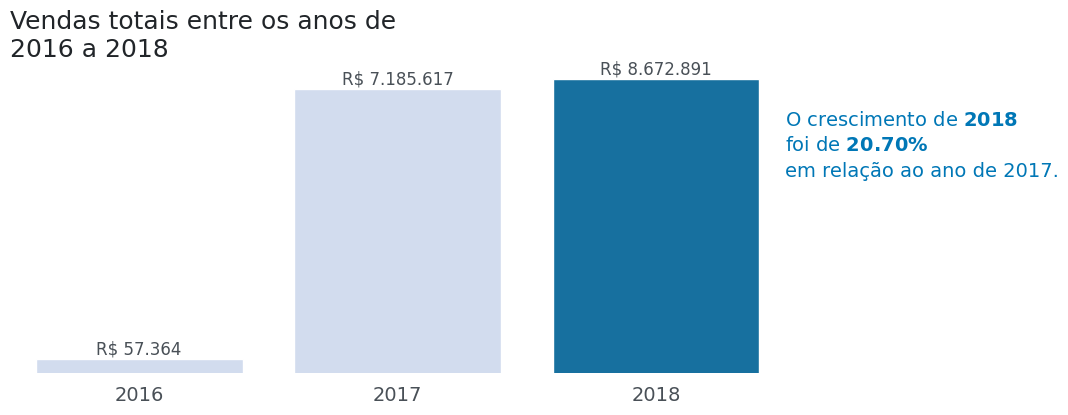

In [54]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Definindo as cores do gráfico
cores = []
for ano in dados_vendas_por_ano.index:
    if dados_vendas_por_ano.loc[ano,"preco_total"] == dados_vendas_por_ano["preco_total"].max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

## Chamando a função do gráfico de colunas
ax = grafico(cores)

# Anotando uma conclusão no gráfico
ax.text(2.5, 1.5e6,
        "O crescimento de " + r"$\bf{2018}$" + "\n"
        "foi de " + r"$\bf{" + f"{crescimento:.2f}\%" + r"}$" + "\n"
        "em relação ao ano de 2017.",
        fontsize=14,
        linespacing=1.45,
        color=AZUL2)

fig = ax.get_figure()

Qual o total de vendas por região(estado)? e quais os maiores vendedores por região?


In [55]:
dados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_delay_hours,order_item_id,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,1.0,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,1976.0,9350.0,Maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,1.0,...,BA,perfumaria,29.0,178.0,1.0,400.0,4693.0,31570.0,Belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,1.0,...,GO,automotivo,46.0,232.0,1.0,420.0,9576.0,14840.0,Guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,1.0,...,RN,pet_shop,59.0,468.0,3.0,450.0,6000.0,31842.0,Belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,1.0,...,SP,papelaria,38.0,316.0,4.0,250.0,11475.0,8752.0,Mogi das cruzes,SP


In [56]:
dados.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'approval_delay_hours', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'preco_total',
       'payment_value', 'payment_sequential', 'payment_installments',
       'payment_type', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_volume_cm3', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [57]:
dados_regiao = dados.copy()
dados_regiao = dados_regiao[['order_purchase_timestamp','preco_total','customer_city', 'customer_state', 'customer_zip_code_prefix']]

In [59]:
dados_regiao.head()

,order_purchase_timestamp,preco_total,customer_city,customer_state,customer_zip_code_prefix
0,2017-10-02 10:56:33,38.71,Sao paulo,SP,3149
1,2018-07-24 20:41:37,141.46,Barreiras,BA,47813
2,2018-08-08 08:38:49,179.12,Vianopolis,GO,75265
3,2017-11-18 19:28:06,72.20,Sao goncalo do amarante,RN,59296
4,2018-02-13 21:18:39,28.62,Santo andre,SP,9195
